## Customer Personality Segmentation

Now, we will try to use different unsuprevised techniques to segment the data based on the features we have. Before that, we will vectorize the data i.e. apply one hot encoding and MinMaxScalar to the features. 


1. Load data
2. Feature Engineering
3. One Hot Encoding (Categorical features)
4. MinMaxScaler (Numerical features)
5. PCA (2D & 3D)
6. Cluster Analysis (KMeans & DBSCAN)

In [3]:
from datetime import datetime
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN



#### 1. Load data

In [4]:
data = pd.read_csv("../data/processed/processed_data.csv", sep=",")

In [4]:
print("Shape of data; {0}".format(data.shape))

Shape of data; (2214, 27)


In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [5]:
# Change datatype of date
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%Y-%m-%d") 

In [6]:
# Lets drop 'ID'
data.drop('ID', inplace=True, axis=1)

#### 2. Feature Engineering

In [7]:
# create a new columns 
# 'Cust_Age' : TODAY() - Year_Birth
# 'Cust_Tenure': TODAY() - Dt_Customer

data['Cust_Age'] = 2023 - data['Year_Birth']
data['Cust_Tensure'] = (datetime.now() - data['Dt_Customer']).dt.days

In [8]:
# Now lets drop Year_Birth & Dt_Customer
data.drop(['Dt_Customer', 'Year_Birth'], inplace=True, axis=1)

In [19]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cust_Age,Cust_Tensure
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,66,3882
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,69,3332
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,58,3531
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,39,3358
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,42,3380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,0,56,3600
2210,PhD,Together,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,0,0,77,3238
2211,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,0,42,3374
2212,Master,Together,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,0,67,3375


#### 3. OneHotEncoding

In [9]:
# Lets divide all our columns into categorical & numerical
categorical_features = []
numerical_features = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)
        
print("Categorical features: {0}".format(categorical_features))
print("Numerical features: {0}".format(numerical_features))

Categorical features: ['Education', 'Marital_Status']
Numerical features: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Cust_Age', 'Cust_Tensure']


In [10]:
data = pd.get_dummies(data, categorical_features, dtype=int)

#### 4. MinMaxScaler

In [11]:
# Initiliaze
scaler = MinMaxScaler()

# Fit and Transform
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [30]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Cust_Age,Cust_Tensure,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
0,0.343850,0.0,0.0,0.585859,0.425318,0.455959,0.554878,0.664093,0.458333,0.302405,...,0.378641,0.948498,0,1,0,0,0,0,1,0
1,0.269625,0.5,0.5,0.383838,0.007368,0.005181,0.006098,0.007722,0.005208,0.020619,...,0.407767,0.161660,0,1,0,0,0,0,1,0
2,0.428654,0.0,0.0,0.262626,0.285332,0.253886,0.129065,0.428571,0.109375,0.144330,...,0.300971,0.446352,0,1,0,0,0,0,0,1
3,0.145656,0.5,0.0,0.262626,0.007368,0.020725,0.020325,0.038610,0.015625,0.017182,...,0.116505,0.198856,0,1,0,0,0,0,0,1
4,0.344825,0.5,0.0,0.949495,0.115874,0.222798,0.119919,0.177606,0.140625,0.051546,...,0.145631,0.230329,0,0,0,1,0,1,0,0


#### 5. PCA - Reduced Dimensionality Data Visualization 

2-Dimensional

In [42]:
start = datetime.now()
print("PCA started.")
# Initialize the PCA 
pca = PCA(n_components=2)

# Fit and transform
pca_data = pca.fit_transform(data)

print("PCA completed. Time taken: {0}".format(datetime.now()-start))

PCA started.
PCA completed. Time taken: 0:00:00.014238


In [43]:
data_pca = pd.DataFrame(data = pca_data, columns=['PCA1', 'PCA2'])
data_pca.head()

,PCA1,PCA2
0,0.968695,0.731122
1,0.373805,-0.064199
2,0.638005,0.461642
3,0.351095,0.102768
4,-0.739618,-0.521504


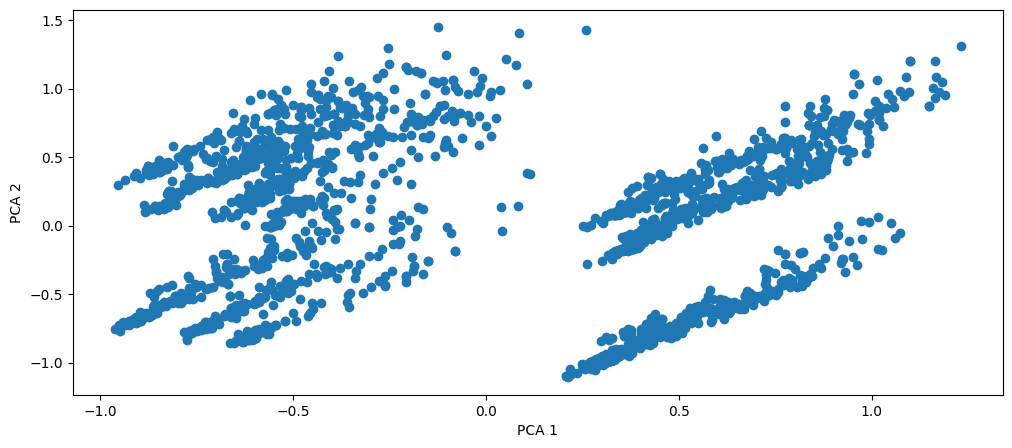

In [45]:
# Visualize PCA data
fig = plt.figure(figsize=(12,5))
plt.scatter(data_pca['PCA1'], data_pca['PCA2'])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

From above, it can be seen that, there are 2 major clusters. On left side, the data is bit scattered. On right side, 2 subclusters can be seen. This is totally up to viewer's perspective on how to cluster this scatter plot.

3-Dimensional

In [46]:
start = datetime.now()
print("PCA started.")
# Initialize the PCA 
pca = PCA(n_components=3)

# Fit and transform
pca_data = pca.fit_transform(data)

print("PCA completed. Time taken: {0}".format(datetime.now()-start))

PCA started.
PCA completed. Time taken: 0:00:00.016388


In [47]:
data_pca_3d = pd.DataFrame(data = pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
data_pca_3d.head()

,PCA1,PCA2,PCA3
0,0.968696,0.731121,0.485194
1,0.373806,-0.064199,-0.792088
2,0.638005,0.461642,-0.318084
3,0.351095,0.102768,-0.950019
4,-0.739618,-0.521504,0.449900


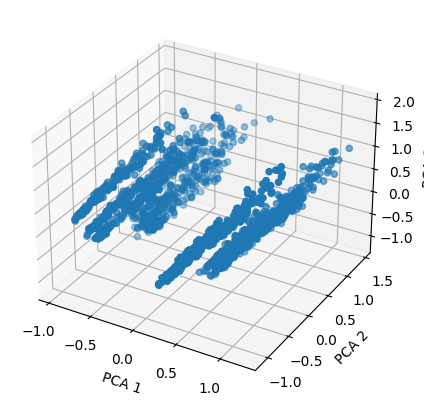

In [53]:
# Visualize PCA data
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca_3d['PCA1'], data_pca_3d['PCA2'], data_pca_3d['PCA3'])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

#### 6. Cluster Analysis
Our goal here is to segment customers and we will be using k-means analysis and DBSCAN. As part of the process, we will try to assess the right number of clusters using elbow method. 

##### 1. KMeans

In [59]:
k_values = range(1,20)

sum_squared_distances = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    sum_squared_distances.append(kmeans.inertia_)

c:\Data Science\Projects\2023-04-21 - Customer Personality Segmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Data Science\Projects\2023-04-21 - Customer Personality Segmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Data Science\Projects\2023-04-21 - Customer Personality Segmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Data Science\Projects\2023-04-21 - Customer Personality Segmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWar

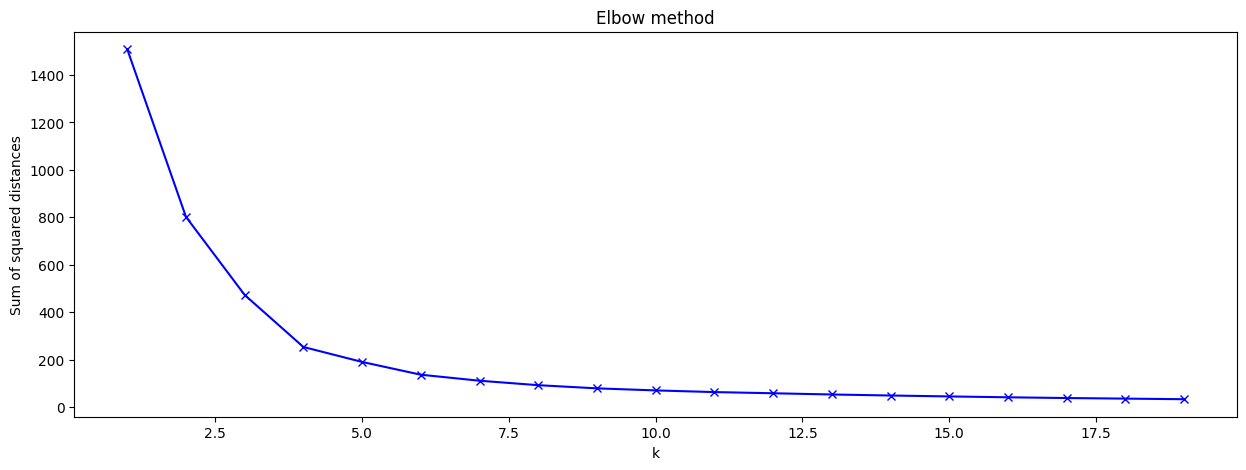

In [60]:
# Plot 
plt.figure(figsize=(15,5))
plt.plot(k_values, sum_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.show()

From above, it can be seen that there is not much change after when k is 4, 5. Lets take k=5 and try to group our data points.

In [90]:
start = datetime.now()
n_cluster = 5
print("KMeans started")
kmeans = KMeans(n_clusters=n_cluster)
kmeans.fit(data_pca)
print("KMeans completed. Time taken: {0}".format(datetime.now()-start))
labels = kmeans.labels_
data_pca['Kmeans_Cluster'] = labels

KMeans started


c:\Data Science\Projects\2023-04-21 - Customer Personality Segmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans completed. Time taken: 0:00:00.794704


<Figure size 1200x500 with 0 Axes>

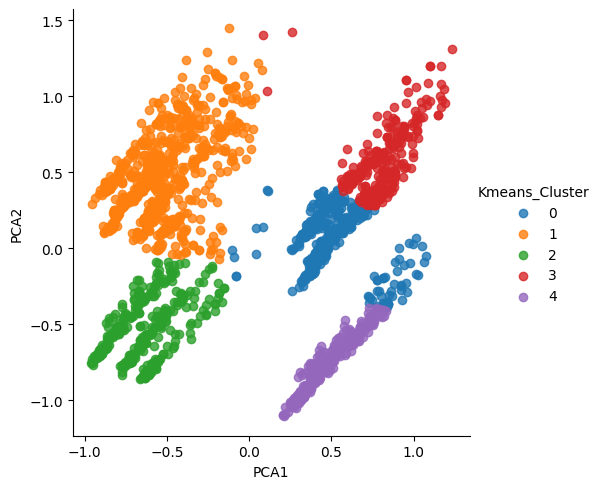

In [91]:
fig = plt.figure(figsize=(12,5))
sns.lmplot(data=data_pca, x='PCA1', y='PCA2', hue='Kmeans_Cluster', fit_reg=False)
plt.show()

In [12]:
start = datetime.now()
n_cluster = 5
print("KMeans started")
kmeans = KMeans(n_clusters=n_cluster)
kmeans.fit(data)
print("KMeans completed. Time taken: {0}".format(datetime.now()-start))
labels = kmeans.labels_
data['Kmeans_Cluster'] = labels

KMeans started


c:\Data Science\Projects\2023-04-21 - Customer Personality Segmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans completed. Time taken: 0:00:02.776283


In [13]:
data.groupby(by="Kmeans_Cluster")['Kmeans_Cluster'].count()

Kmeans_Cluster
0    282
1    429
2    479
3    622
4    402
Name: Kmeans_Cluster, dtype: int64

In [14]:
k_means_grouped = data.groupby('Kmeans_Cluster')

In [20]:
pd.concat([ k_means_grouped.size().rename('count'), k_means_grouped.mean()], axis=1)

,count,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Cust_Age,Cust_Tensure,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
Kmeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,282,0.311274,0.234043,0.265957,0.504083,0.208883,0.154301,0.183460,0.176442,0.154976,...,0.268746,0.527709,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
1,429,0.298321,0.229604,0.250583,0.495891,0.183372,0.153037,0.168837,0.160461,0.159941,...,0.249711,0.510416,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
2,479,0.327241,0.202505,0.301670,0.490901,0.273376,0.098857,0.165082,0.101676,0.099578,...,0.290188,0.489733,0.000000,0.0,0.000000,1.0,0.154489,0.392484,0.208768,0.244259
3,622,0.281264,0.239550,0.228296,0.484118,0.174313,0.117672,0.141518,0.135638,0.125042,...,0.257703,0.502891,0.406752,0.0,0.593248,0.0,0.127010,0.382637,0.210611,0.279743
4,402,0.309756,0.210199,0.233831,0.520931,0.186471,0.166731,0.183493,0.165399,0.162015,...,0.255905,0.508189,0.000000,1.0,0.000000,0.0,0.380597,0.000000,0.619403,0.000000


##### 2. DBSCAN

In [88]:
start = datetime.now()
print("DBSCAN started")
dbscan = DBSCAN(eps=0.3, min_samples=4)
dbscan.fit(data_pca)
print("DBSCAN completed. Time taken: {0}".format(datetime.now()-start))
labels = dbscan.labels_
data_pca['DBSCAN_Cluster'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

DBSCAN started
DBSCAN completed. Time taken: 0:00:00.150723
Estimated number of clusters: 5
Estimated number of noise points: 3


<Figure size 1200x500 with 0 Axes>

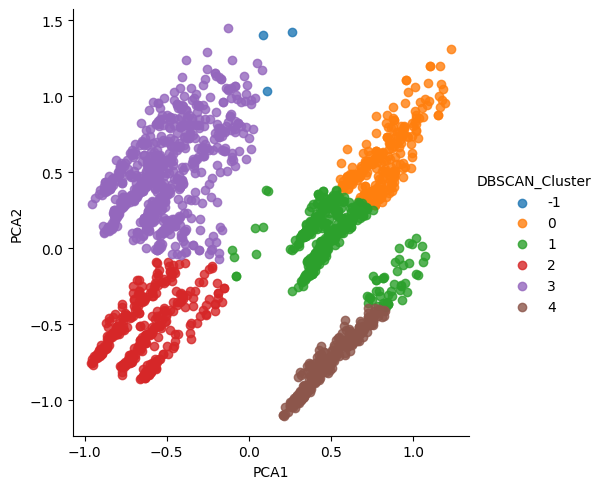

In [89]:
# Visualize PCA data
fig = plt.figure(figsize=(12,5))
sns.lmplot(data=data_pca, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', fit_reg=False)
plt.show()

It can be seen that both methods have given us almost same results for reduced-dimensional data except the DBSCAN has classified few points as noise which are colored with blue.

Now we will to try to run DBSCAN for our original data set and see how many clusters it returns.

In [118]:
start = datetime.now()
print("DBSCAN started")
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan.fit(data)
print("DBSCAN completed. Time taken: {0}".format(datetime.now()-start))
labels = dbscan.labels_
data['DBSCAN_Cluster'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

DBSCAN started
DBSCAN completed. Time taken: 0:00:00.483457
Estimated number of clusters: 16
Estimated number of noise points: 134


In [119]:
data.groupby(by="DBSCAN_Cluster")['DBSCAN_Cluster'].count()

DBSCAN_Cluster
-1     134
 0     228
 1     200
 2     126
 3      73
 4      96
 5      12
 6     316
 7      67
 8     319
 9     397
 10     93
 11     37
 12     75
 13     24
 14     10
 15      7
Name: DBSCAN_Cluster, dtype: int64